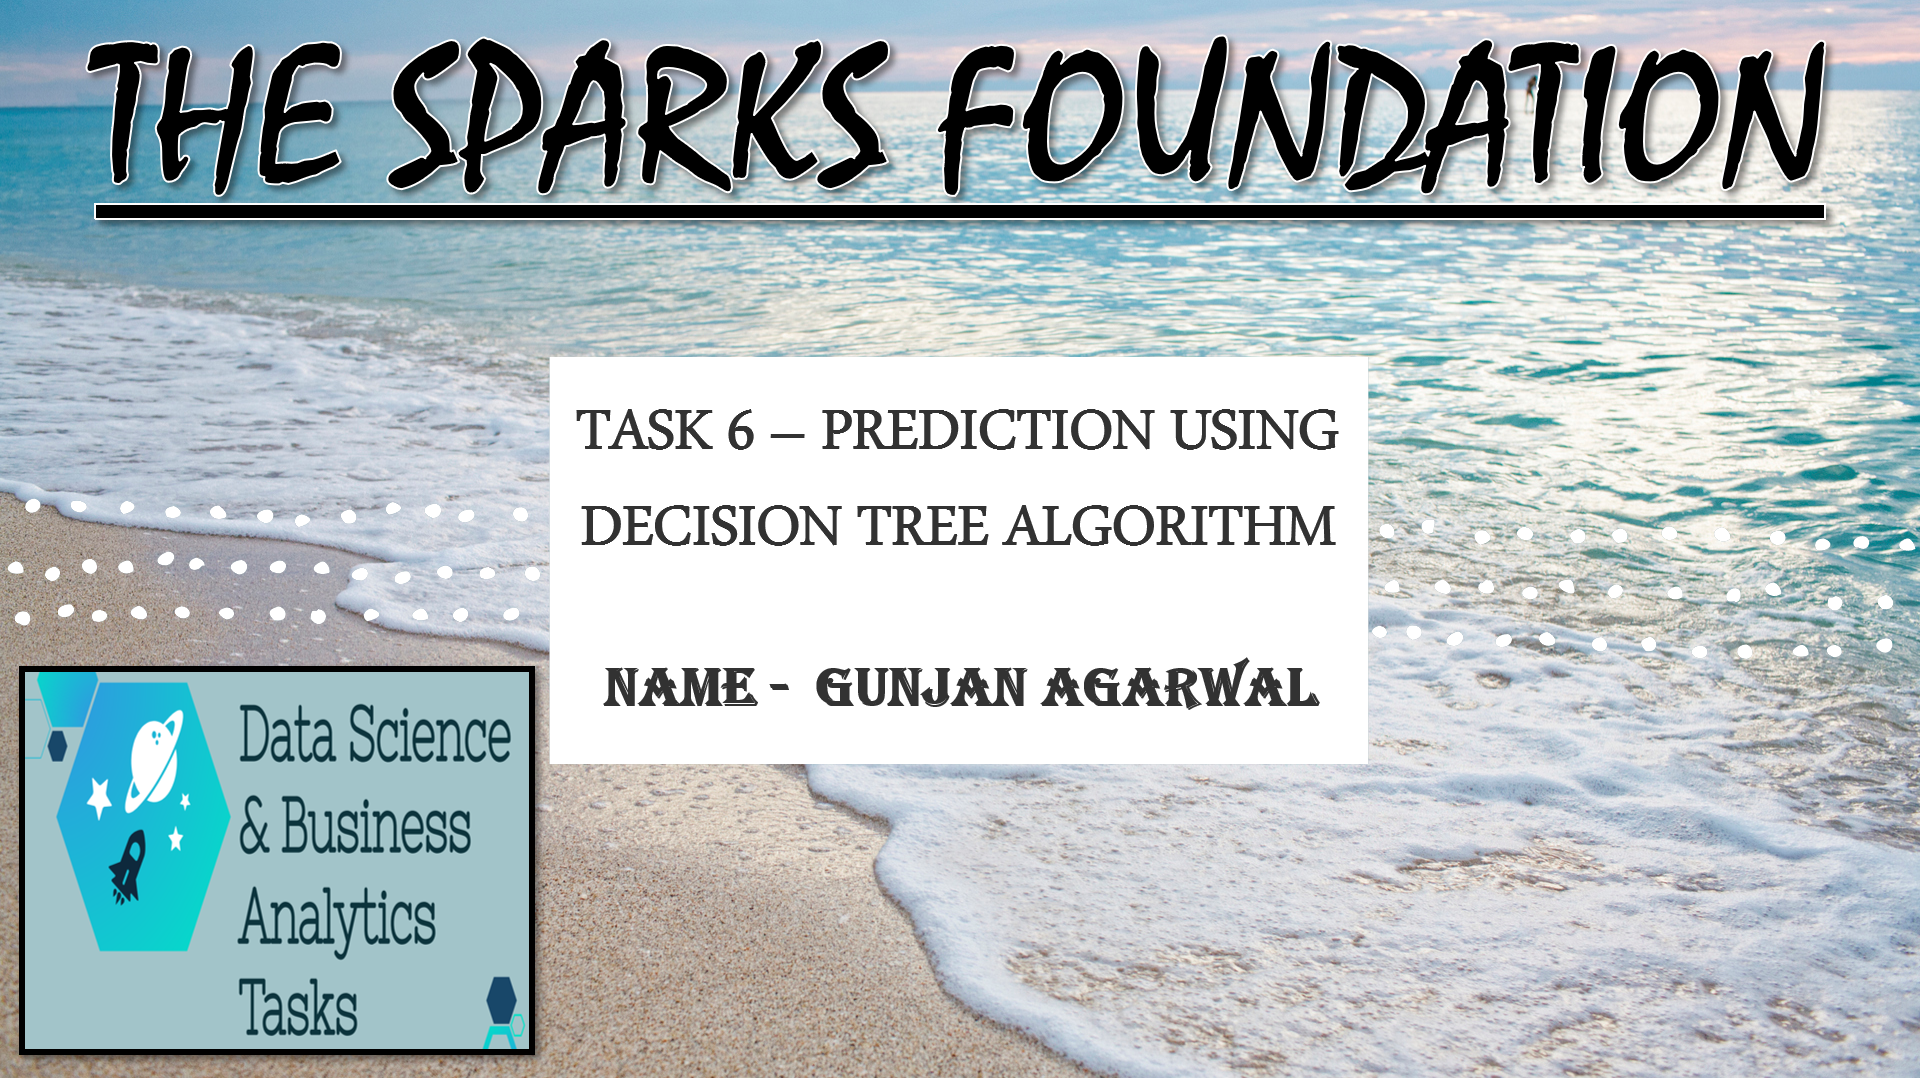

# Objective - to train model using Decision Tree Classifier and predict the right class for the new data and visualize it graphically

# IMPORTING LIBRARIES

In [1]:
import pandas as pd                    # used for data analysis
import numpy as np                     # used for mathematical operations
import seaborn as sns                  # used for data visualization
import matplotlib.pyplot as plt        # used for data visualization

# READING THE DATASET

In [2]:
df = pd.read_csv("iris.csv", sep = "\t")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

# DATA PRE-PROCESSING

## CHECKING THE DIMENSIONS OF THE DATASET

In [3]:
df.shape

(150, 6)

## CHECKING FOR NULL VALUES IN THE DATA

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## CHECKING FOR DUPLICATE ENTERIES IN THE DATA

In [5]:
df.duplicated().sum()

0

## CHECKING FOR THE UNIQUE VALUES FOR EVERY COLUMN 

In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

## CHECKING FOR COMPLETE INFORMATION OF THE DATASET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Exploratory Data Analysis

## STATISTICS OF THE DATASET

In [8]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

## CORRELATION OF THE DATASET

<AxesSubplot:>

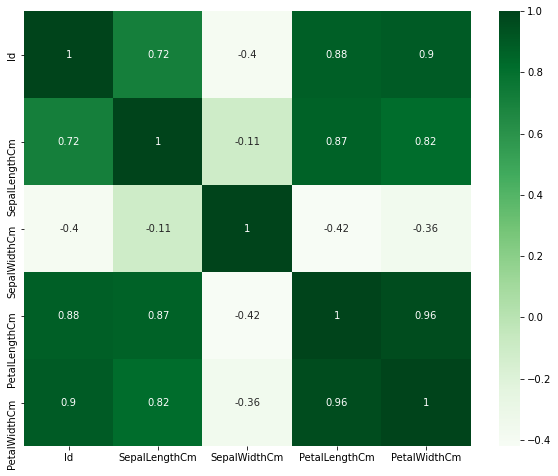

In [9]:
plt.figure(figsize=(10,8))
x = df.corr()
sns.heatmap(x,annot=True,cmap="Greens")

Text(0, 0.5, 'Petal Width Cm')

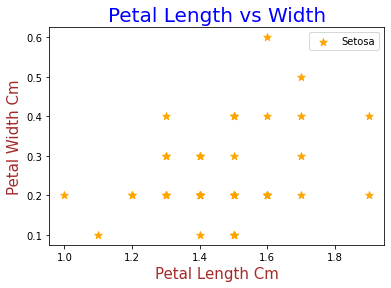

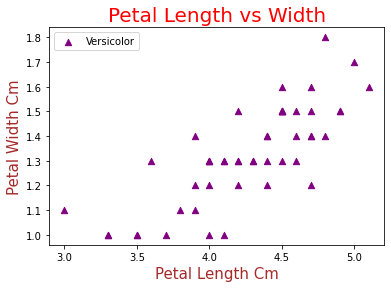

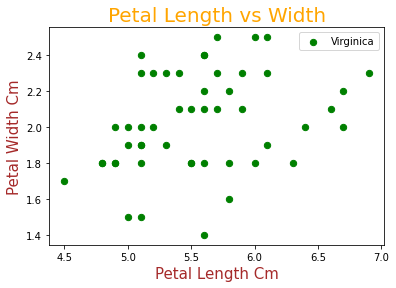

In [10]:
df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa',marker="*",s=60)
plt.title("Petal Length vs Width",color="blue", size=20)
plt.xlabel("Petal Length Cm", color="brown", size=15)
plt.ylabel("Petal Width Cm", color="brown", size=15)
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='purple',label='Versicolor',marker="^",s=40)
plt.title("Petal Length vs Width",color="red", size=20)
plt.xlabel("Petal Length Cm", color="brown", size=15)
plt.ylabel("Petal Width Cm", color="brown", size=15)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica',s=40)
plt.title("Petal Length vs Width",color="orange", size=20)
plt.xlabel("Petal Length Cm", color="brown", size=15)
plt.ylabel("Petal Width Cm", color="brown", size=15)

Text(0, 0.5, 'Sepal Width Cm')

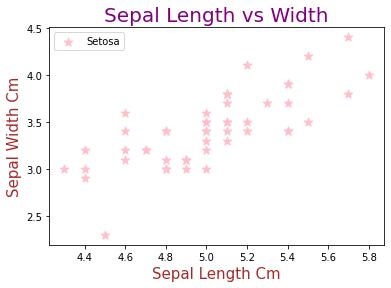

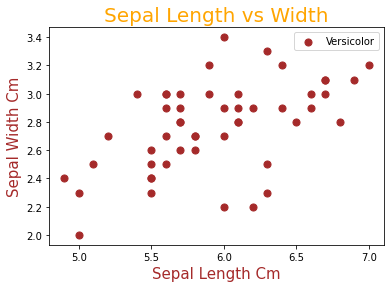

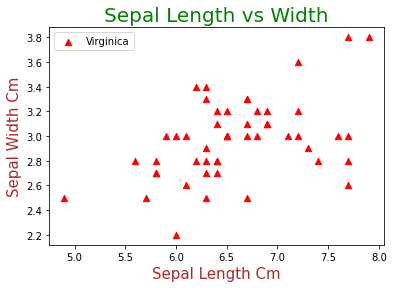

In [11]:
df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='pink', label='Setosa',s=80,marker="*")
plt.title("Sepal Length vs Width",color="purple", size=20)
plt.xlabel("Sepal Length Cm", color="brown", size=15)
plt.ylabel("Sepal Width Cm", color="brown", size=15)
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='brown', label='Versicolor',s=50)
plt.title("Sepal Length vs Width",color="orange", size=20)
plt.xlabel("Sepal Length Cm", color="brown", size=15)
plt.ylabel("Sepal Width Cm", color="brown", size=15)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='red', label='Virginica',marker="^",s=40)
plt.title("Sepal Length vs Width",color="green", size=20)
plt.xlabel("Sepal Length Cm", color="brown", size=15)
plt.ylabel("Sepal Width Cm", color="brown", size=15)

Text(0.5, 1.0, 'Sepal Width for Species')

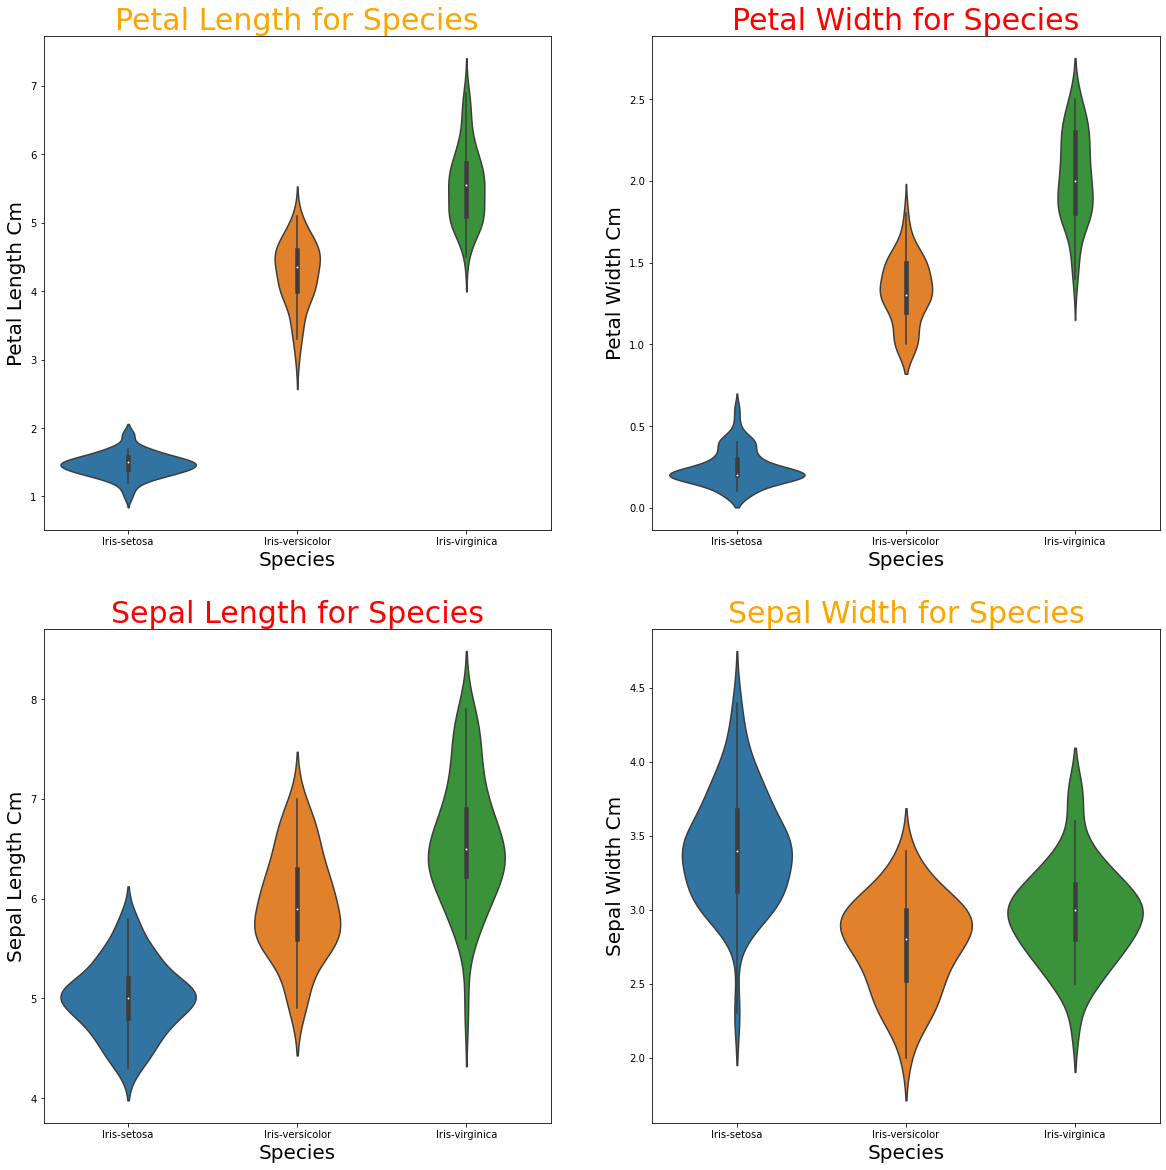

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.xlabel("Species",size=20)
plt.ylabel("Petal Length Cm",size=20)
plt.title("Petal Length for Species",size=30,color="orange")
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.xlabel("Species",size=20)
plt.ylabel("Petal Width Cm",size=20)
plt.title("Petal Width for Species",size=30,color="red")
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.xlabel("Species",size=20)
plt.ylabel("Sepal Length Cm",size=20)
plt.title("Sepal Length for Species",size=30,color="red")
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.xlabel("Species",size=20)
plt.ylabel("Sepal Width Cm",size=20)
plt.title("Sepal Width for Species",size=30,color="orange")

### the white dot represents the median
### the thick gray bar in the center represents the interquartile range
### the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
### On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

# MODEL BUILDING

## SPLITTING X (INDEPENDENT FEATURES/DESCRIPTIVE FEATURES) AND Y (DEPENDENT FEATURE/TARGET FEATURE)

In [13]:
X = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,-1].values

## LABEL ENCODING  (Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

In [15]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# SPLITTING THE DATA INTO TRAIN AND TEST SET

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [18]:
X_train.shape

(105, 4)

In [19]:
X_test.shape

(45, 4)

In [20]:
Y_train.shape

(105,)

In [21]:
Y_test.shape

(45,)

# CREATING AND FITTING THE MODEL

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
dt_classifier.score(X_test,Y_test)

0.9777777777777777

# PREDICTIONS 

In [24]:
predictions = dt_classifier.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

# CREATING A DATAFRAME FOR ACTUAL AND PREDICTED VALUES 

In [25]:
new_df = pd.DataFrame({'Actual Values': Y_test, 'Predicted Values': predictions})  
new_df

Actual Values  Predicted Values
0               2                 2
1               1                 1
2               0                 0
3               2                 2
4               0                 0
5               2                 2
6               0                 0
7               1                 1
8               1                 1
9               1                 1
10              2                 2
11              1                 1
12              1                 1
13              1                 1
14              1                 1
15              0                 0
16              1                 1
17              1                 1
18              0                 0
19              0                 0
20              2                 2
21              1                 1
22              0                 0
23              0                 0
24              2                 2
25              0                 0
26              0                 0
27              1                 1
28              1                 1
29              0                 0
30              2                 2
31              1                 1
32              0                 0
33              2                 2
34              2                 2
35              1                 1
36              0                 0
37              1                 2
38              1                 1
39              1                 1
40              2                 2
41              0                 0
42              2                 2
43              0                 0
44              0                 0

# EVALUATION METRICS

## CONFUSION MATRIX

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,predictions)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

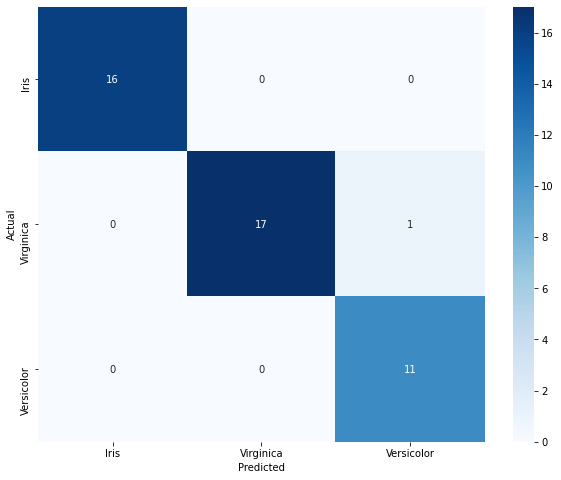

In [27]:
plt.figure(figsize = (10,8))
confusion_matrix = pd.crosstab(new_df['Actual Values'], new_df['Predicted Values'], rownames=['Actual'], colnames=['Predicted'])
columns = ['Iris', 'Virginica', 'Versicolor']
rows = ['Iris', 'Virginica', 'Versicolor']
sns.heatmap(confusion_matrix, annot=True, xticklabels=columns, yticklabels=rows, cmap='Blues')
plt.show()

## CLASSIFICATION REPORT

In [28]:
from sklearn.metrics import classification_report
target_names = ['Iris', 'Virginica', 'Versicolor']
print(classification_report(Y_test,predictions, target_names=target_names))

              precision    recall  f1-score   support

        Iris       1.00      1.00      1.00        16
   Virginica       1.00      0.94      0.97        18
  Versicolor       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## VISUALIZING DECISION TREE

In [29]:
feature_names = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
target_names = ['Iris Setosa','Iris Versicolor','Iris Virginica']

In [30]:
from sklearn.tree import plot_tree

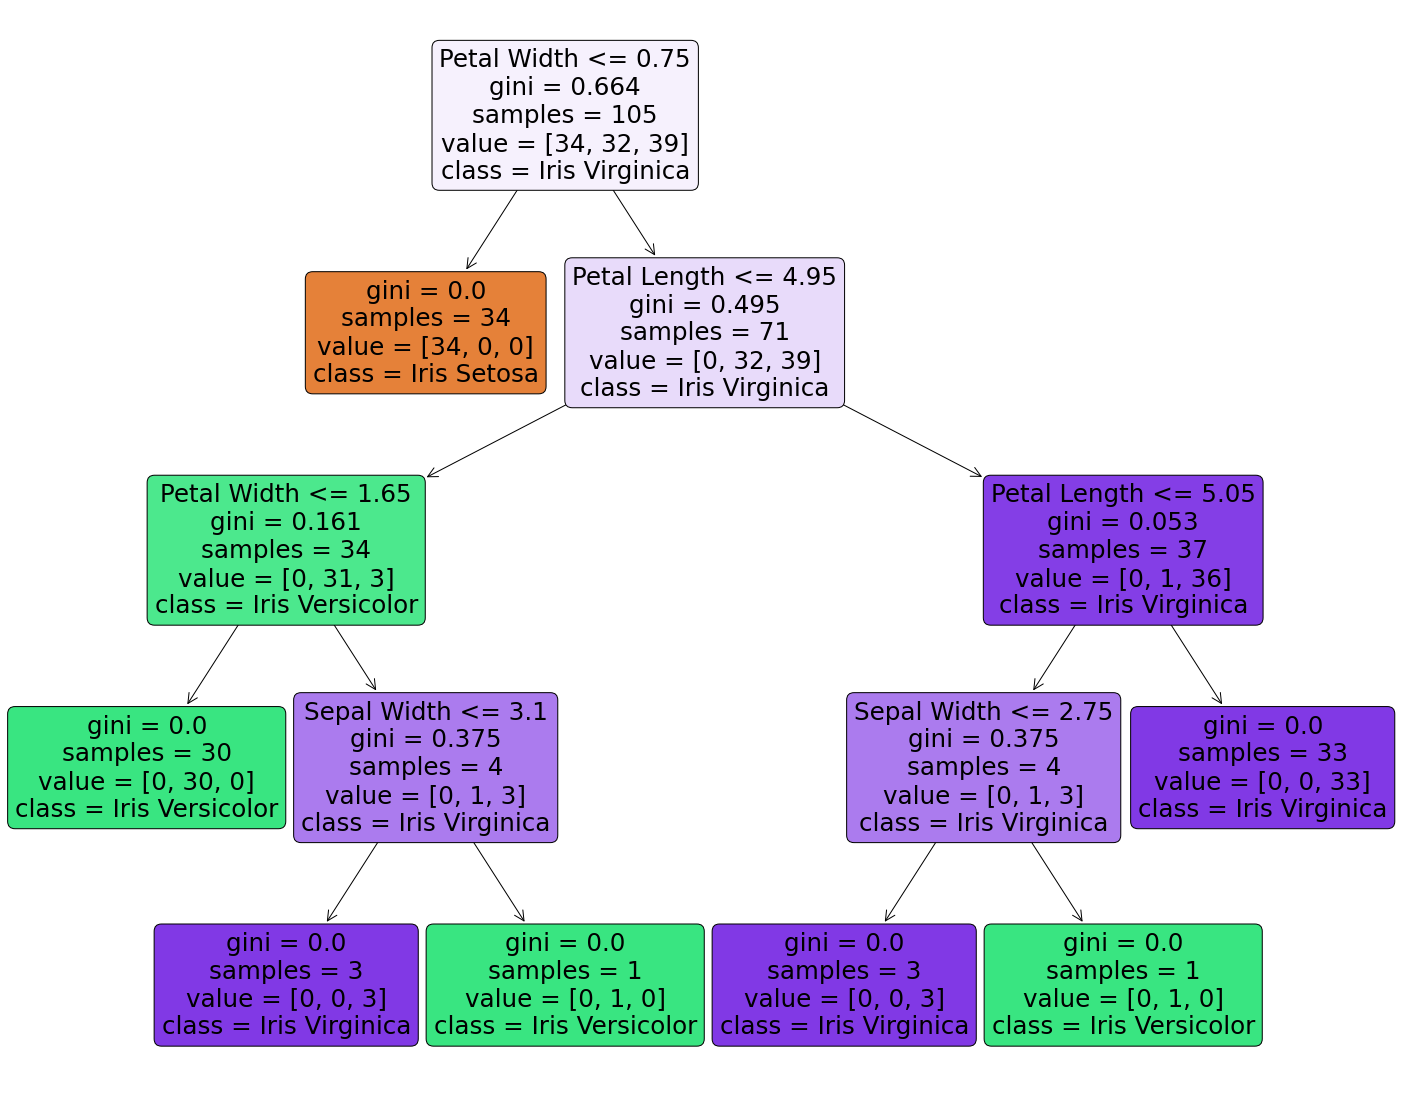

In [31]:
plt.figure(figsize=(25,20))
plot_tree(dt_classifier, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

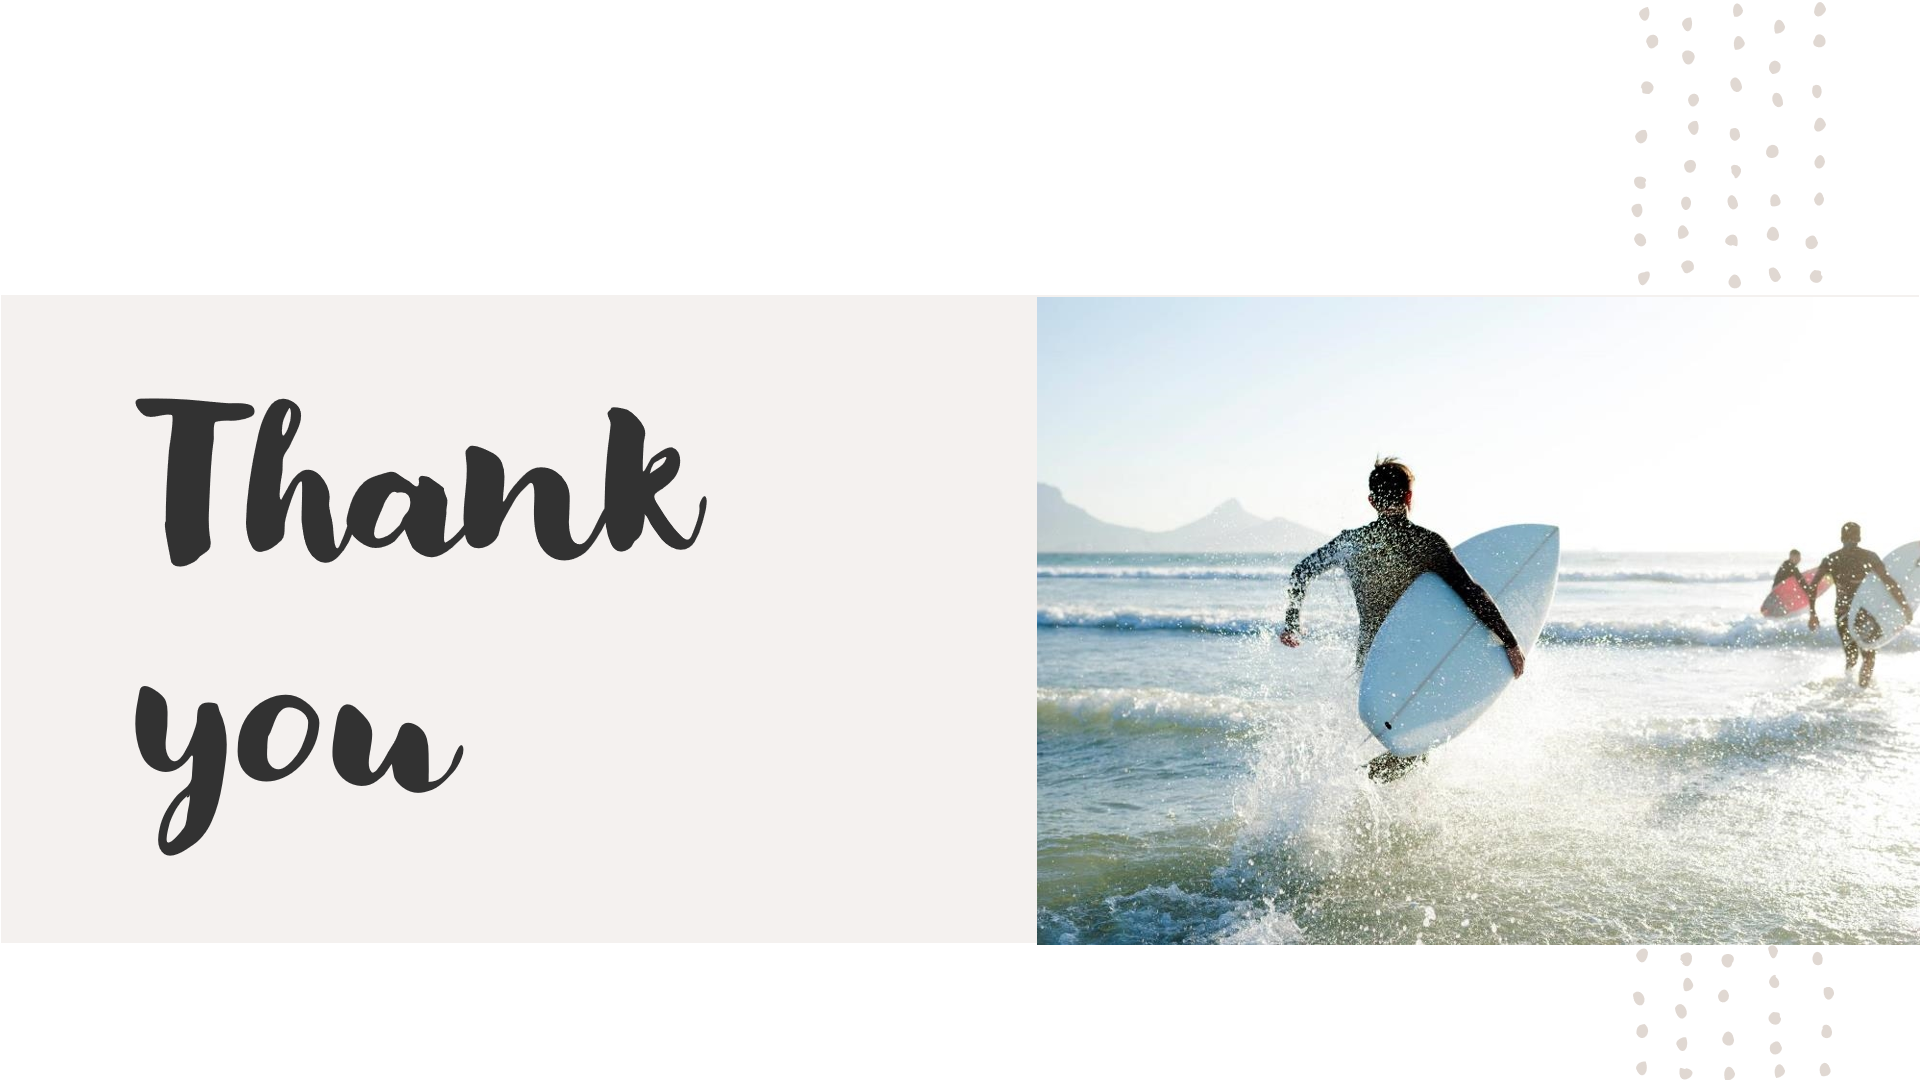